In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
os.getcwd()

'/home/b08209033/Dycore/exp/Shallow_Water'

In [2]:
file = h5py.File('daily.jld', 'r')
print(file)

<HDF5 file "daily.jld" (mode r)>


In [3]:
for key in file.keys():
    print(key)

div_daily_mean
h_daily_mean
u_daily_mean
v_daily_mean
vor_daily_mean


In [4]:
u = file["u_daily_mean"]
v = file["v_daily_mean"]
h = file["h_daily_mean"]
vor = file["vor_daily_mean"]
div = file["div_daily_mean"]
print(h)

<HDF5 dataset "h_daily_mean": shape (11, 1, 128, 256), type "<f8">


(0.0, 0.15)

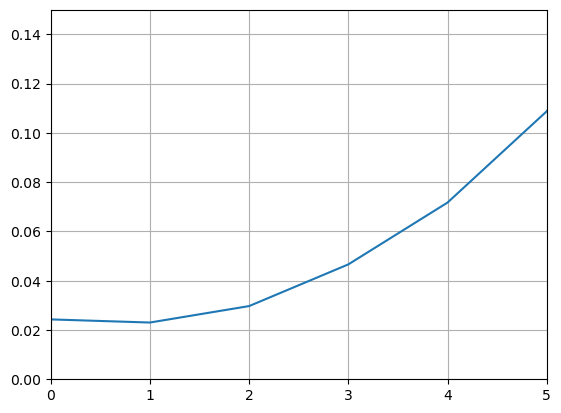

In [5]:
maxv = v[:].reshape(11,-1)
plt.grid()
plt.plot(np.max(maxv, axis = 1))
plt.xlim(0,5)
plt.ylim(0.00,0.15)

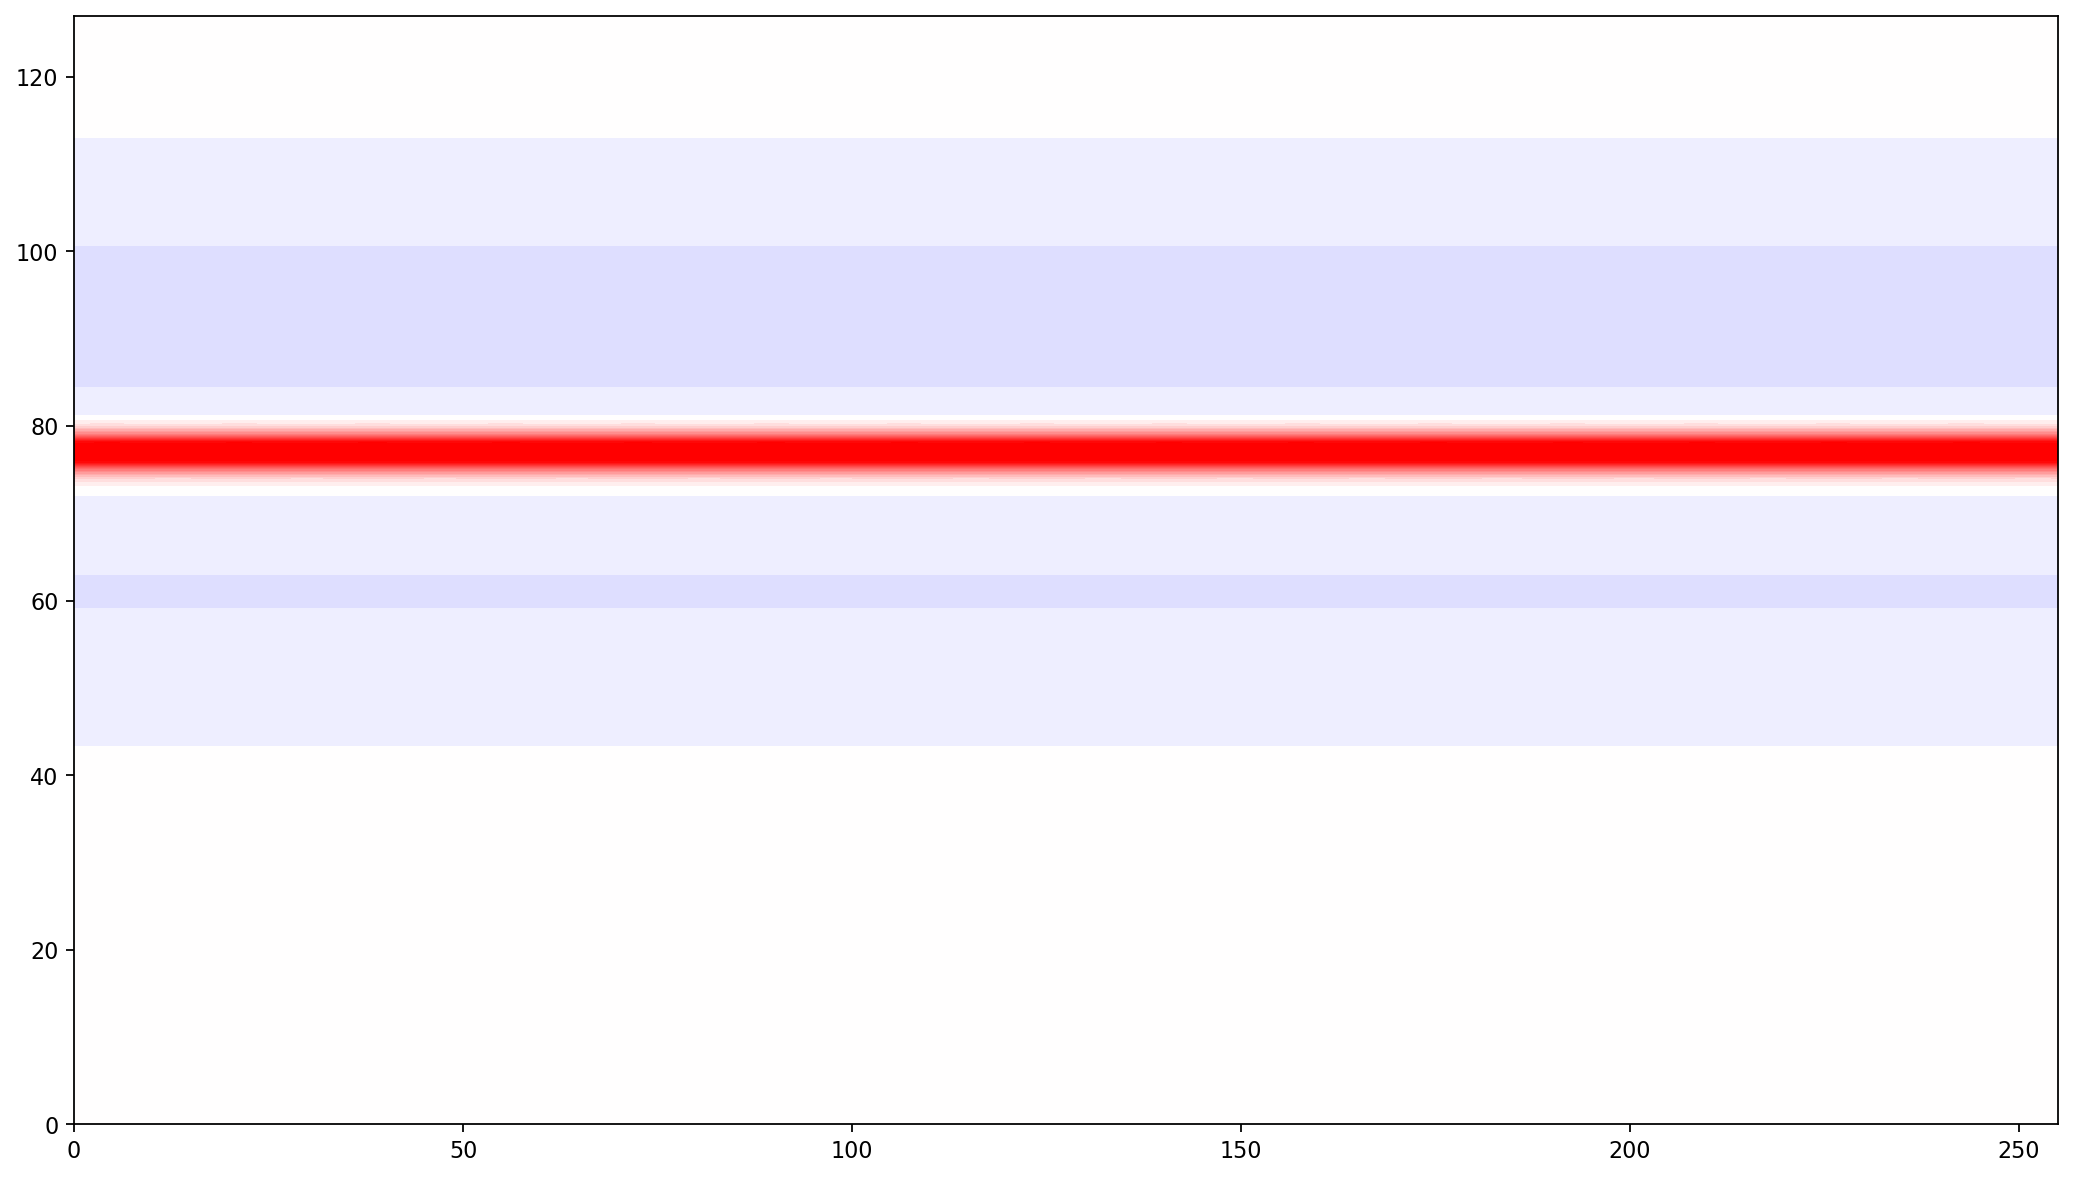

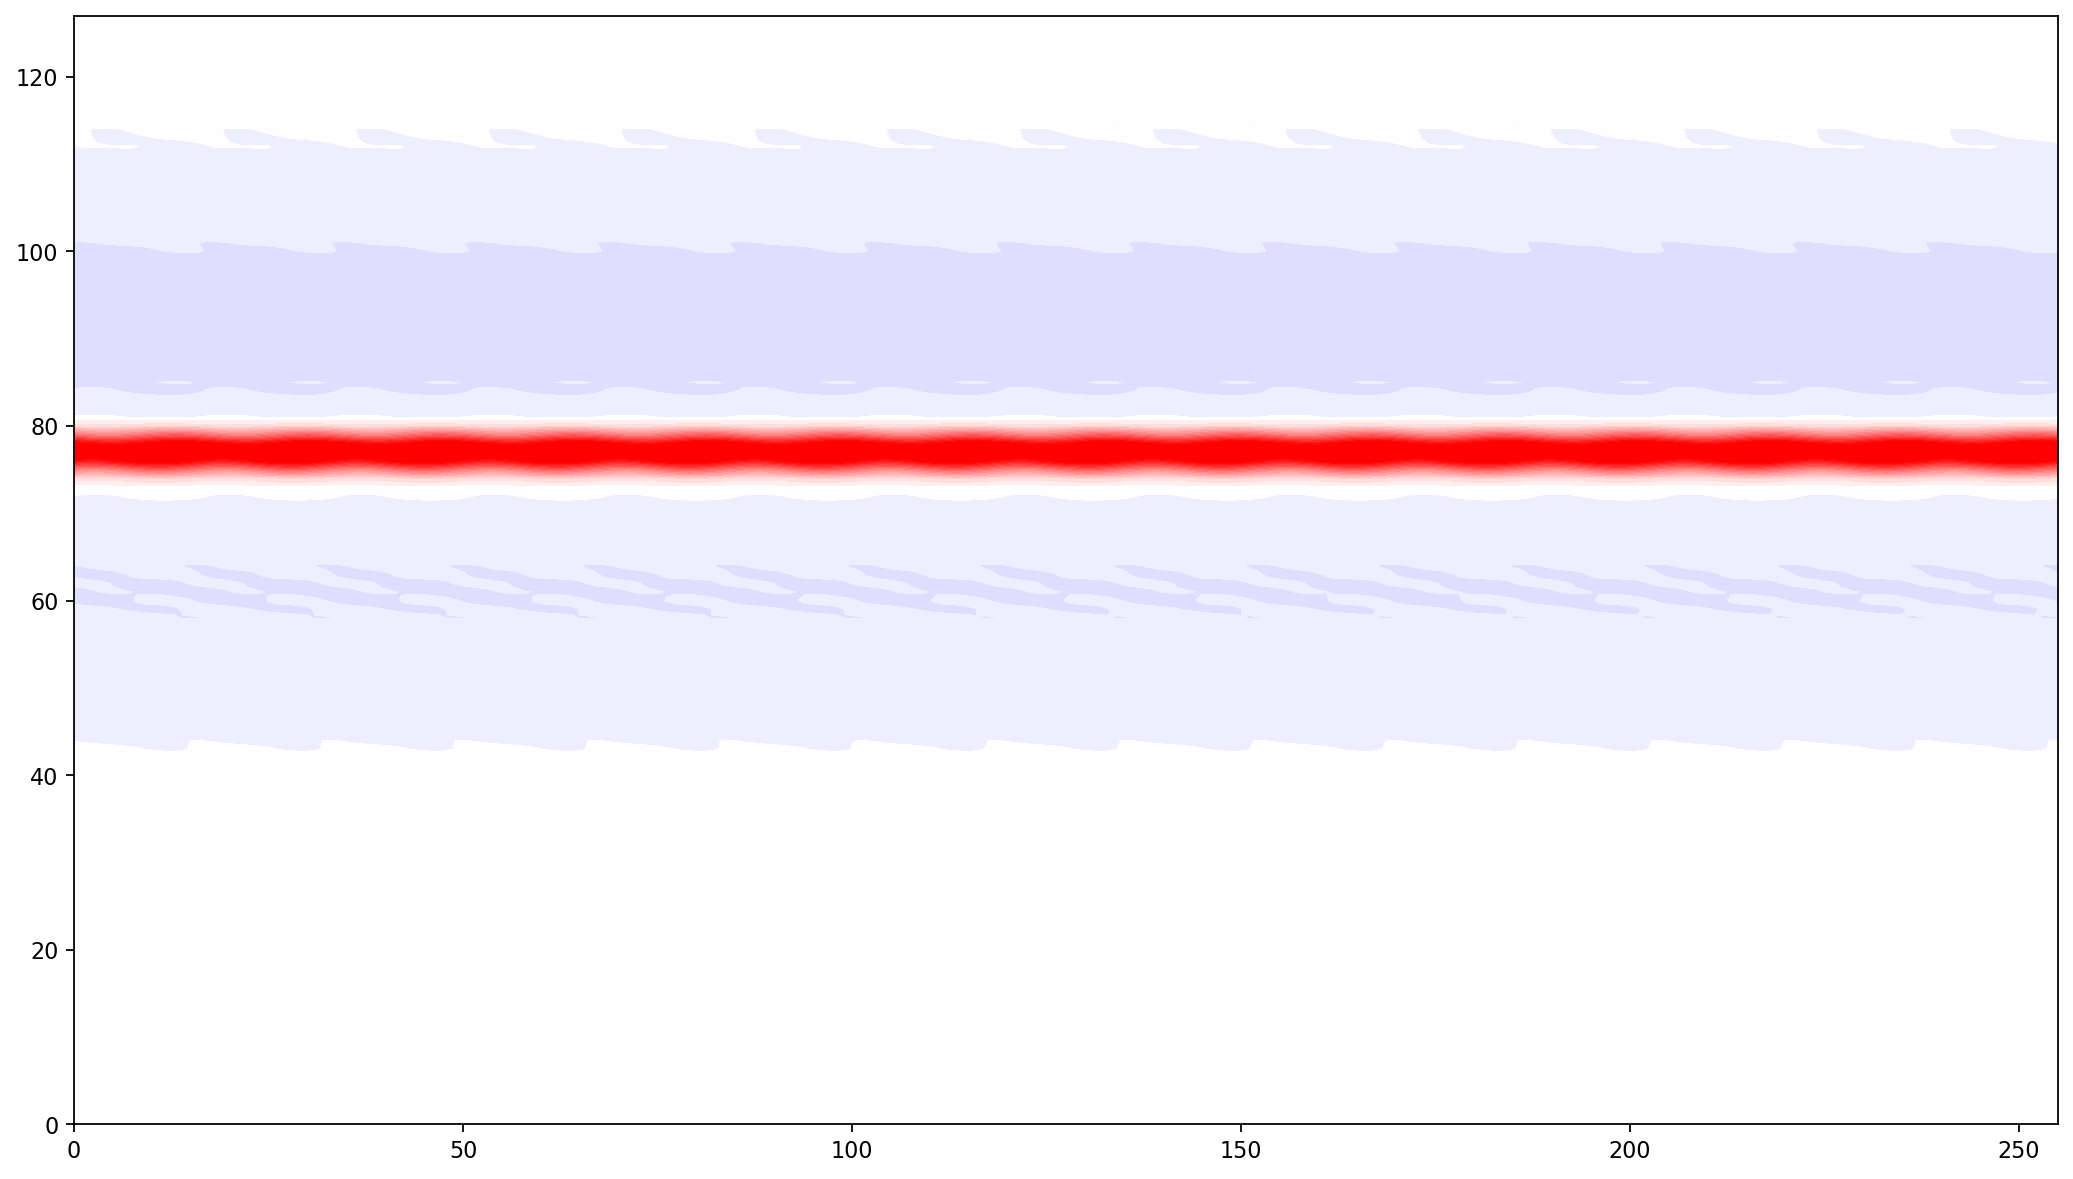

In [7]:
t_index = -1

# plt.figure(figsize = (16,9),
#            dpi = 160)
# plt.contourf(h[t_index,-1,:,:], levels = np.linspace(h[0].min(),h[0].max(),64), extend = "both", cmap = "bwr")
# plt.show()

# plt.figure(figsize = (16,9),
#            dpi = 160)
# plt.contourf(u[t_index,-1,:,:], levels = np.linspace(-10,10,64), extend = "both", cmap = "bwr")
# plt.show()
plt.figure(figsize = (16,9),
           dpi = 160)
plt.contourf(vor[0,-1,:,:], levels = np.linspace(-4e-5,4e-5,32), extend = "both", cmap = "bwr")
#plt.quiver(u[t_index,-1,:,:],v[t_index,-1,:,:])
plt.show()
plt.figure(figsize = (16,9),
           dpi = 160)
plt.contourf(vor[-1,-1,:,:], levels = np.linspace(-4e-5,4e-5,32), extend = "both", cmap = "bwr")
#plt.quiver(u[t_index,-1,:,:],v[t_index,-1,:,:])
plt.show()


# plt.figure(figsize = (16,9),
#            dpi = 160)
# plt.contourf(vor[t_index,-1,:,:]-vor[0,-1,:,:], levels = np.linspace(-2e-5,2e-5,64), extend = "both", cmap = "bwr")
# plt.show()

# plt.figure(figsize = (16,9),
#            dpi = 160)
# plt.contourf(div[t_index,-1,:,:], levels = 32, extend = "both", cmap = "bwr")
# plt.show()

In [30]:
def evolution_var_2D(data, name):
    fig, ax = plt.subplots(figsize=(16, 9),
                           dpi = 150)
    # Animator
    def animate(i):
        ax.clear()
        im = ax.contourf(data[i,-1,:,:],
                         levels = np.linspace(-4e-5,4e-5,64),
                         extend = "both",
                         cmap='bwr')
        ax.set_title(f"{str(name)}")
        return im,
    anim = animation.FuncAnimation(fig, animate, 180, interval=50, blit=False)
    anim.save(name)
    return anim

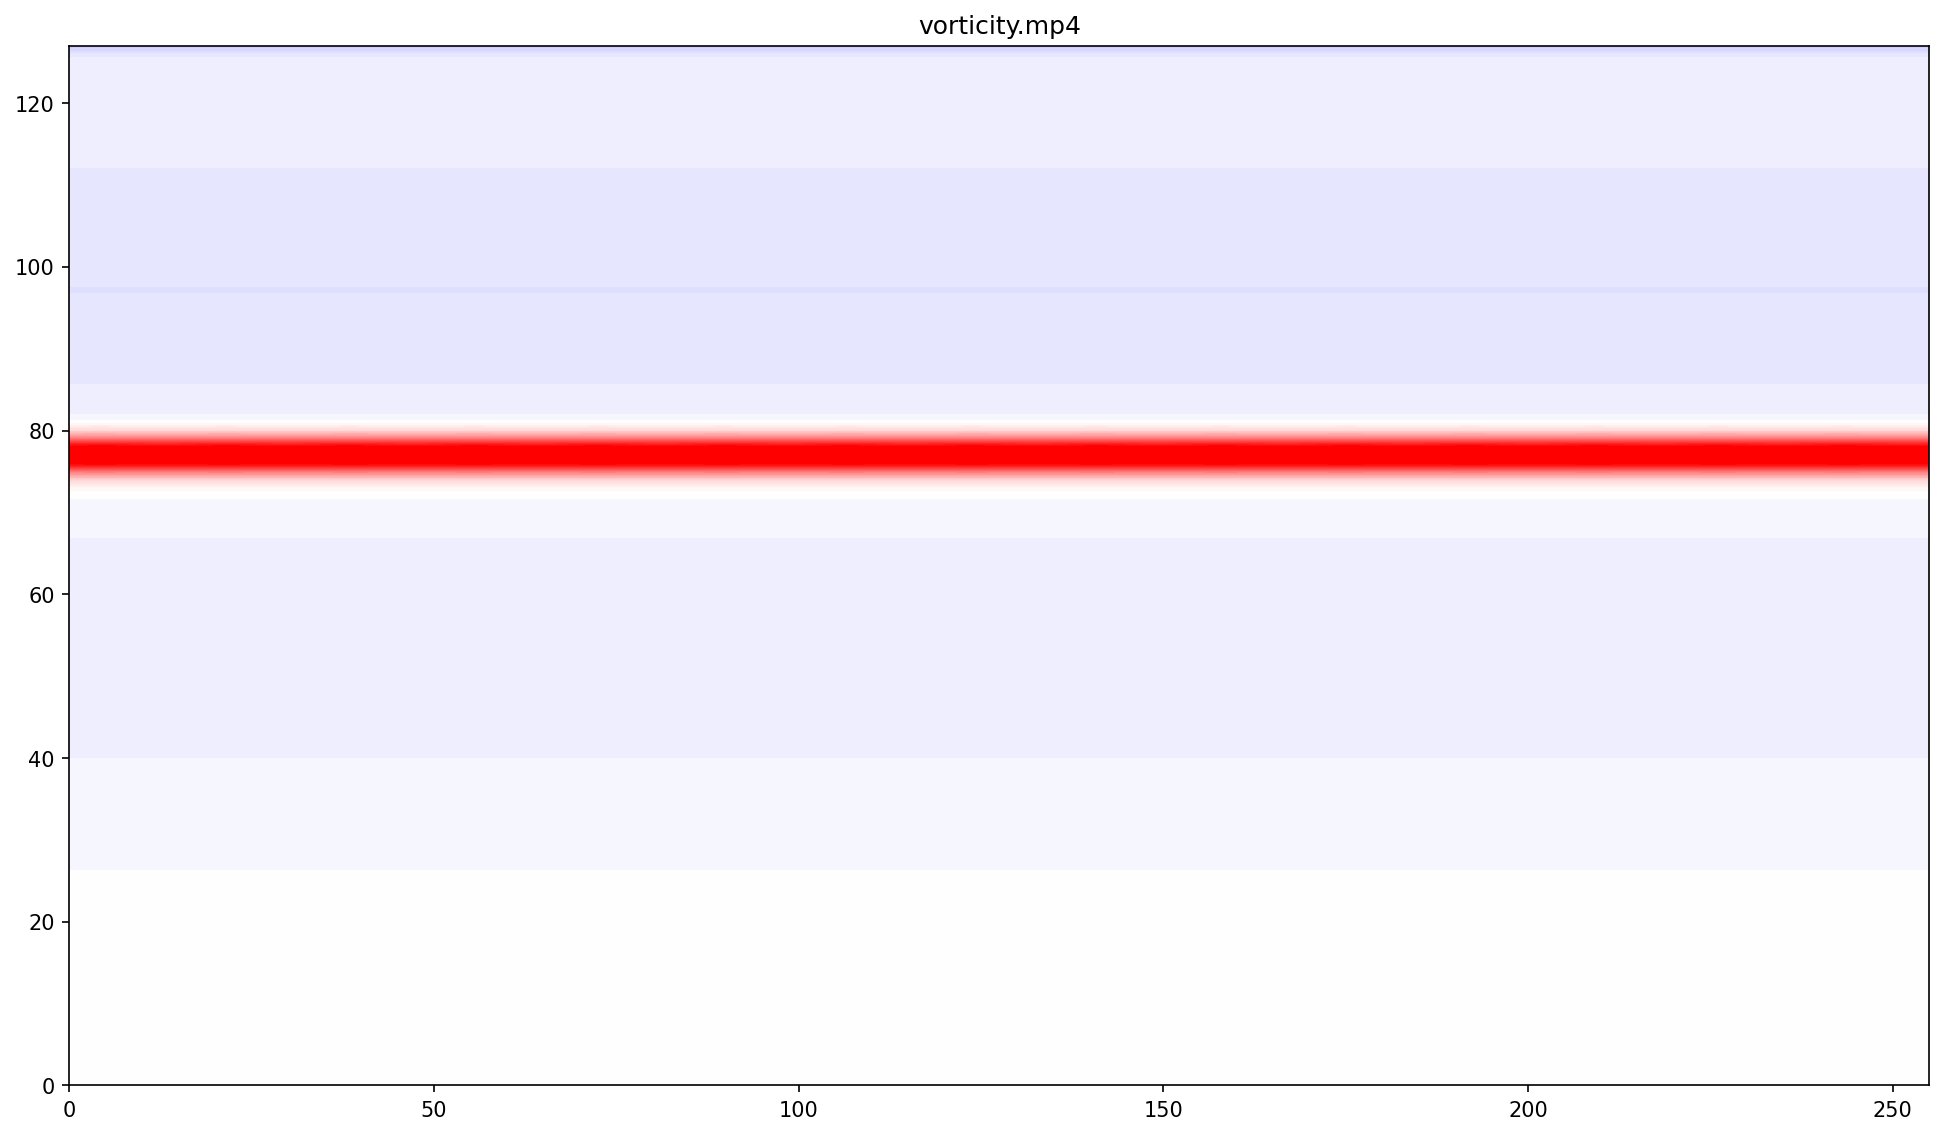

In [31]:
evolution_var_2D(vor, "vorticity.mp4")

In [12]:
N = 5

diff_matrix_1st = (- np.roll(np.eye(N), 1, axis = 0) + np.roll(np.eye(N), -1, axis = 0))/2
diff_matrix_1st[0, :] = 0
diff_matrix_1st[0, 0] = -1
diff_matrix_1st[0, 1] = 1
diff_matrix_1st[-1, :] = 0
diff_matrix_1st[-1, -2] = -1
diff_matrix_1st[-1, -1] = 1
# diff_matrix_1st /= dy

eigenvalues, eigenvectors = np.linalg.eig(diff_matrix_1st)

In [7]:
print(diff_matrix_1st) 
print(eigenvectors[:,1])
#print(eigenvalues)
print(diff_matrix_1st@eigenvectors[:,1])
print(eigenvalues[1]*eigenvectors[:,1])

[[-1.   1.   0.   0.   0. ]
 [-0.5  0.   0.5  0.   0. ]
 [ 0.  -0.5  0.   0.5  0. ]
 [ 0.   0.  -0.5  0.   0.5]
 [ 0.   0.   0.  -1.   1. ]]
[ 4.15710225e-16+0.37796447j  2.67261242e-01+0.37796447j
  5.34522484e-01-0.j          2.67261242e-01-0.37796447j
 -1.61326172e-16-0.37796447j]
[ 2.67261242e-01-8.32667268e-16j  2.67261242e-01-1.88982237e-01j
 -7.49400542e-16-3.77964473e-01j -2.67261242e-01-1.88982237e-01j
 -2.67261242e-01+0.00000000e+00j]
[ 2.67261242e-01-4.82782706e-16j  2.67261242e-01-1.88982237e-01j
 -2.67047626e-16-3.77964473e-01j -2.67261242e-01-1.88982237e-01j
 -2.67261242e-01+3.02906018e-16j]
